In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
original_data=pd.read_csv('C:\Pneumonia 123.csv')

In [4]:
original_data.head(10)

,Data As Of,Start Week,End Week,MMWRyear,MMWRweek,Week Ending Date,Group,Indicator,Jurisdiction,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia or Influenza,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Week-ending,United States,All Ages,0.0,60033.0,4102.0,432.0,4534.0,4534.0,NaN
1,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Week-ending,United States,0-17 years,0.0,667.0,19.0,22.0,41.0,41.0,NaN
2,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Week-ending,United States,18-64 years,0.0,14708.0,767.0,183.0,950.0,950.0,NaN
3,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Week-ending,United States,65 years and over,0.0,44658.0,3316.0,227.0,3543.0,3543.0,NaN
4,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Week-ending,Alabama,All Ages,0.0,1098.0,67.0,NaN,72.0,72.0,One or more data cells have counts between 1-9...
5,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Week-ending,Alabama,0-17 years,0.0,16.0,0.0,0.0,0.0,0.0,NaN
6,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Week-ending,Alabama,18-64 years,0.0,297.0,13.0,NaN,14.0,14.0,One or more data cells have counts between 1-9...
7,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Week-ending,Alabama,65 years and over,0.0,785.0,54.0,NaN,58.0,58.0,One or more data cells have counts between 1-9...
8,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Week-ending,Alaska,All Ages,0.0,91.0,NaN,NaN,NaN,NaN,One or more data cells have counts between 1-9...
9,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Week-ending,Alaska,0-17 years,0.0,NaN,0.0,NaN,NaN,NaN,One or more data cells have counts between 1-9...


In [5]:
original_data=original_data.drop(['Indicator','Footnote'],axis=1)

In [6]:
original_data.head()

,Data As Of,Start Week,End Week,MMWRyear,MMWRweek,Week Ending Date,Group,Jurisdiction,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia or Influenza,"Pneumonia, Influenza, or COVID-19 Deaths"
0,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,United States,All Ages,0.0,60033.0,4102.0,432.0,4534.0,4534.0
1,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,United States,0-17 years,0.0,667.0,19.0,22.0,41.0,41.0
2,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,United States,18-64 years,0.0,14708.0,767.0,183.0,950.0,950.0
3,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,United States,65 years and over,0.0,44658.0,3316.0,227.0,3543.0,3543.0
4,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Alabama,All Ages,0.0,1098.0,67.0,NaN,72.0,72.0


In [7]:
week=original_data[(original_data['MMWRweek']==1) & (original_data['Age Group']=='All Ages')&(original_data['Jurisdiction']!='United States')]
week

,Data As Of,Start Week,End Week,MMWRyear,MMWRweek,Week Ending Date,Group,Jurisdiction,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia or Influenza,"Pneumonia, Influenza, or COVID-19 Deaths"
4,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Alabama,All Ages,0.0,1098.0,67.0,NaN,72.0,72.0
8,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Alaska,All Ages,0.0,91.0,NaN,NaN,NaN,NaN
12,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Arizona,All Ages,0.0,1278.0,83.0,NaN,87.0,87.0
16,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Arkansas,All Ages,0.0,697.0,57.0,NaN,63.0,63.0
20,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,California,All Ages,0.0,5865.0,465.0,43.0,508.0,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,10/07/2021,01/03/2021,01/09/2021,2021,1,01/09/2021,By Week,HHS Region 6,All Ages,3800.0,11135.0,2462.0,NaN,2469.0,4228.0
13592,10/07/2021,01/03/2021,01/09/2021,2021,1,01/09/2021,By Week,HHS Region 7,All Ages,1012.0,3776.0,560.0,NaN,562.0,1140.0
13596,10/07/2021,01/03/2021,01/09/2021,2021,1,01/09/2021,By Week,HHS Region 8,All Ages,496.0,2330.0,320.0,0.0,320.0,577.0
13600,10/07/2021,01/03/2021,01/09/2021,2021,1,01/09/2021,By Week,HHS Region 9,All Ages,6456.0,15300.0,4420.0,NaN,4426.0,6968.0


In [8]:
total=original_data['Total Deaths'].sum()
total

34956043.0

In [9]:
lst=[]
for i in range(1,40):
    week=original_data[(original_data['MMWRweek']==i) & (original_data['Age Group']=='All Ages')]
    total=week['Pneumonia Deaths'].sum()
    lst.append(total)
lst
    

[62887.0,
 63143.0,
 59536.0,
 53217.0,
 48210.0,
 42001.0,
 38283.0,
 33744.0,
 31168.0,
 29156.0,
 27753.0,
 28823.0,
 32709.0,
 44508.0,
 50740.0,
 49479.0,
 45616.0,
 40796.0,
 36792.0,
 33138.0,
 29369.0,
 27113.0,
 25597.0,
 24304.0,
 23202.0,
 22565.0,
 23851.0,
 27517.0,
 30561.0,
 34796.0,
 39116.0,
 44703.0,
 48530.0,
 50085.0,
 50025.0,
 47150.0,
 41852.0,
 32214.0,
 21171.0]

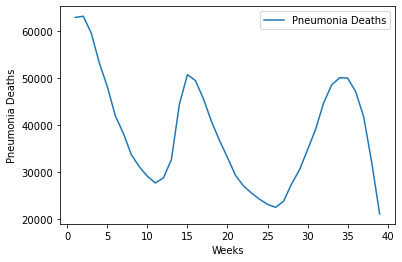

In [10]:
weeks=[]
for x in range(1,40):
    weeks.append(x)
weeks
weeks_deaths= pd.DataFrame({ 'weeks' : weeks , 'Pneumonia Deaths' :lst })
weeks_deaths
weeks_deaths.plot('weeks','Pneumonia Deaths')
plt.xlabel('Weeks')
plt.ylabel('Pneumonia Deaths')
plt.savefig('Pneumonia deaths.png')
plt.show()

In [11]:
original_data

,Data As Of,Start Week,End Week,MMWRyear,MMWRweek,Week Ending Date,Group,Jurisdiction,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia or Influenza,"Pneumonia, Influenza, or COVID-19 Deaths"
0,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,United States,All Ages,0.0,60033.0,4102.0,432.0,4534.0,4534.0
1,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,United States,0-17 years,0.0,667.0,19.0,22.0,41.0,41.0
2,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,United States,18-64 years,0.0,14708.0,767.0,183.0,950.0,950.0
3,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,United States,65 years and over,0.0,44658.0,3316.0,227.0,3543.0,3543.0
4,10/07/2021,12/29/2019,01/04/2020,2020,1,01/04/2020,By Week,Alabama,All Ages,0.0,1098.0,67.0,NaN,72.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23179,10/07/2021,09/26/2021,10/02/2021,2021,39,10/02/2021,By Week,HHS Region 9,65 years and over,162.0,1570.0,185.0,0.0,185.0,237.0
23180,10/07/2021,09/26/2021,10/02/2021,2021,39,10/02/2021,By Week,HHS Region 10,All Ages,92.0,523.0,64.0,0.0,64.0,109.0
23181,10/07/2021,09/26/2021,10/02/2021,2021,39,10/02/2021,By Week,HHS Region 10,0-17 years,0.0,NaN,NaN,0.0,NaN,NaN
23182,10/07/2021,09/26/2021,10/02/2021,2021,39,10/02/2021,By Week,HHS Region 10,18-64 years,31.0,123.0,18.0,0.0,18.0,33.0


In [12]:
lst2=[]
for i in range(1,40):
    week=original_data[(original_data['MMWRweek']==i) & (original_data['Age Group']=='All Ages')]
    total=week['COVID-19 Deaths'].sum()
    lst2.append(total)
lst2

[77697.0,
 76863.0,
 70767.0,
 60705.0,
 50814.0,
 40296.0,
 32263.0,
 25782.0,
 20025.0,
 17092.0,
 14669.0,
 14946.0,
 21931.0,
 43014.0,
 62012.0,
 65107.0,
 58847.0,
 51357.0,
 44436.0,
 37142.0,
 29758.0,
 25315.0,
 21033.0,
 17788.0,
 16202.0,
 15895.0,
 18315.0,
 23011.0,
 29370.0,
 36448.0,
 43410.0,
 50279.0,
 56219.0,
 58569.0,
 58683.0,
 53891.0,
 47530.0,
 34890.0,
 20617.0]

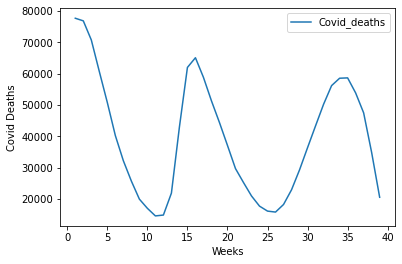

In [13]:
coviddeaths_week=pd.DataFrame({ 'weeks' : weeks , 'Covid_deaths' :lst2 })
coviddeaths_week
coviddeaths_week.plot('weeks','Covid_deaths')
plt.xlabel('Weeks')
plt.ylabel('Covid Deaths')
plt.savefig('Covid_deaths.png')
plt.show()





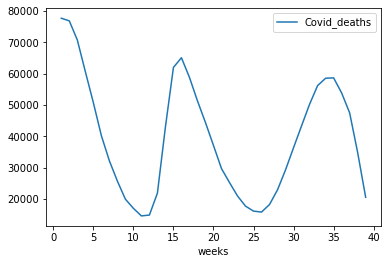

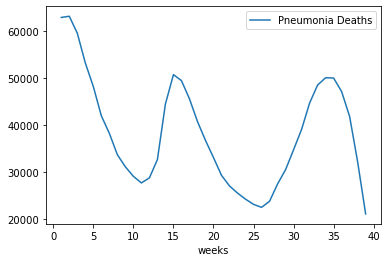

In [14]:
coviddeaths_week.plot('weeks','Covid_deaths')
weeks_deaths.plot('weeks','Pneumonia Deaths')
plt.show()


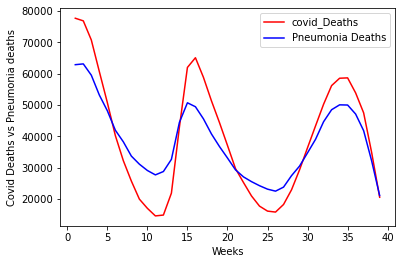

In [15]:

weeks_deaths["covid_Deaths"]=lst2
weeks_deaths
ax=plt.gca()
weeks_deaths.plot('weeks','covid_Deaths',color='red',ax=ax)
weeks_deaths.plot('weeks','Pneumonia Deaths',color='blue',ax=ax)
plt.savefig('analysis.png')
plt.xlabel('Weeks')
plt.ylabel('Covid Deaths vs Pneumonia deaths')
plt.show()



In [16]:

weeks_deaths

,weeks,Pneumonia Deaths,covid_Deaths
0,1,62887.0,77697.0
1,2,63143.0,76863.0
2,3,59536.0,70767.0
3,4,53217.0,60705.0
4,5,48210.0,50814.0
5,6,42001.0,40296.0
6,7,38283.0,32263.0
7,8,33744.0,25782.0
8,9,31168.0,20025.0
9,10,29156.0,17092.0


In [17]:
peak=weeks_deaths[(weeks_deaths['weeks']>=12)&(weeks_deaths['weeks']<=17)]
peak
# week=original_data[(original_data['MMWRweek']==i) & (original_data['Age Group']=='All Ages')]

,weeks,Pneumonia Deaths,covid_Deaths
11,12,28823.0,14946.0
12,13,32709.0,21931.0
13,14,44508.0,43014.0
14,15,50740.0,62012.0
15,16,49479.0,65107.0
16,17,45616.0,58847.0


In [18]:
peak.scatter('Pneumonia Deaths','covid_Deaths')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'scatter'

In [19]:
second_data=pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2021.csv')
second_data

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,898.0,939.0,NaN
1,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,3974.0,4101.0,NaN
2,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,10431.0,10789.0,NaN
3,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,26506.0,27400.0,NaN
4,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,57705.0,59504.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322915,11/07/2021,07/01/2021,07/31/2021,By Month,2021.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,29.0,29.0,NaN
322916,11/07/2021,08/01/2021,08/28/2021,By Month,2021.0,8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,310.0,310.0,NaN
322917,11/07/2021,09/01/2021,09/30/2021,By Month,2021.0,9.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,266.0,266.0,NaN
322918,11/07/2021,10/01/2021,10/31/2021,By Month,2021.0,10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,63.0,63.0,NaN


In [20]:
lst3=['All Ages','Not stated']
condition=second_data[(second_data['Condition']=='Influenza and pneumonia')&(second_data['State']=='United States')&(second_data['Group']=='By Total')&(second_data['Age Group'].isin(lst3)==False)]
condition.drop(['Flag','ICD10_codes'],axis='columns',inplace=True)
condition.head(40)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
0,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,0-24,898.0,939.0
1,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,25-34,3974.0,4101.0
2,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,35-44,10431.0,10789.0
3,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,45-54,26506.0,27400.0
4,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,55-64,57705.0,59504.0
5,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,65-74,89083.0,91422.0
6,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,75-84,94893.0,96715.0
7,11/07/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,85+,81401.0,82296.0


Text(0, 0.5, 'COVID-19 Deaths(Due to influenza and Pneumonia)')

<Figure size 432x288 with 0 Axes>

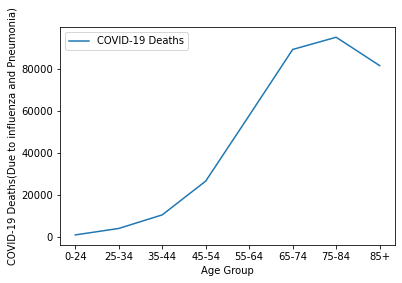

In [21]:
plt.savefig('covid-19deaths due to influenza and Pneumonia vs ages.png')
condition.plot('Age Group','COVID-19 Deaths')
plt.ylabel('COVID-19 Deaths(Due to influenza and Pneumonia)')

